# Kohonen Maps

The Kohonen Maps are actually an interesting unsupervised learning algorithm, responsible to clusterize the dataset. I will not discuss a lot about this technique here, because bellow you will see a pretty interesting explanation on how this algorithm works.


## Reading the DataSet

In [1]:

import pandas as pd

data_path = './ifood-data-business-analyst-test/ml_project1_data.csv'
dataset = pd.read_csv(data_path)


## Preprocessing 

> Realise that this preprocessing is very close to the one presented before with in the XGBoost technique, therefore, if one wants to jump this part to the model part, please go for it.

Here we need to provide a simple preprocess to the data to remove possible non informative data, to create information fields that are more suitable for interpretation, some encoding of the features (since some are categorical), also we will make some normalization on the data to avoid over weighting errors and so on... 

> Notice that most functions to do the preprocessing here are implemented in a separated code, since it could be used for other models, and for later analysis.

In [2]:
from utils import *

### Pipeline

The preprocessing pipeline, for the XGBoost classification algorithm will be the one, as follows:

- `Step #1` First we will replace some fields with more interpretable information (Birth date => Age, Customer Registration => Persistence, ...)

- `Step #2` Then we are going to replace the categorical data set with an encoded one (categorical variables => numerical variables)

- `Step #3` Then some non informative features will be dropped from the analysis, _e.g._ features that are constant in all samples (which does not provide any information)

- `Step #4` Since we have only 24 samples with NaN (or null) values, we can drop those from the dataset, instead of concerning with interpolation and so on...

In [3]:

dataset = support.replaceFields(dataset)                # Step #1

dataset, encoders = support.encodeDataSet(dataset)      # Step #2

dataset = support.dropNonInformative(dataset)           # Step #3

df = dataset.dropna()                                   # Step #4


Features dropped: ['Z_CostContact', 'Z_Revenue']


Here we have a simple treatment of the data, by doing some normalization and then some balancing of the dataset, the same wa as discussed in the XGBoost section. Where there is more details, but for now, we create the model in a regression format, with regressors (`phi`) and target (the output). After we do the normalization between one and zero, and finally the dataset is balanced to have the same amount of `1` outputs as `0` outputs.

In [4]:

import numpy as np

# Create the regression format
phi = df.loc[:, ~df.columns.isin(['Response', 'ID'])].to_numpy()
target = df["Response"].to_numpy()

# Normalization
max_vals = np.amax(phi, axis=0)
min_vals = np.amin(phi, axis=0)
phi_n = (phi - max_vals) / (max_vals - min_vals)

# Balancing the data
X, y = support.balanceDataSet(phi_n, target)


## The Kohonen Map

Here this model is known as SOM (Self Organizing Map), but was actually created by Kohonen and it is known between the mathematicians as Kohonen Maps. This model is a unsupervised learning algorithm that builds a weighting image based on input provided features. The main idea is that this model adjusts it self, any $\mathbb{R}_{(n_x, 1)}$ variable into a $\mathbb{R}_{(n_i, n_i)}$ dimensional space where both $n_x, n_i \in \mathbb{N}$. 

A simpler way to understand is that this algorithm is able to get a sample vector, and transform it into an image! This is one of the most interesting techniques of clustering images... this algorithm was the first one used by the Detran in Brazil to classify the letters of a vehicle plate! _I know that because I know the guys that created that for Detran Hehe_. It is pretty powerfull since it measure the pattern information at each point, and usually, by itself is able to classify data without using anything more. So here, we will try to use this approach to see if the data has highlly distinctable patterns, that without the label, we would be able to classify the customers.

 [    629 / 100000 ]   1% - 0:00:31 left 

 [   1269 / 100000 ]   1% - 0:00:31 left 

 [   1909 / 100000 ]   2% - 0:00:31 left 

 [   2528 / 100000 ]   3% - 0:00:31 left 

 [   3178 / 100000 ]   3% - 0:00:30 left 

 [   3822 / 100000 ]   4% - 0:00:30 left 

 [   4430 / 100000 ]   4% - 0:00:30 left 

 [   5030 / 100000 ]   5% - 0:00:30 left 

 [   5609 / 100000 ]   6% - 0:00:30 left 

 [   6244 / 100000 ]   6% - 0:00:30 left 

 [   6881 / 100000 ]   7% - 0:00:30 left 

 [   7502 / 100000 ]   8% - 0:00:29 left 

 [   8109 / 100000 ]   8% - 0:00:29 left 

 [   8690 / 100000 ]   9% - 0:00:29 left 

 [   9271 / 100000 ]   9% - 0:00:29 left 

 [   9886 / 100000 ]  10% - 0:00:29 left 

 [  10516 / 100000 ]  11% - 0:00:29 left 

 [  11137 / 100000 ]  11% - 0:00:29 left 

 [  11714 / 100000 ]  12% - 0:00:28 left 

 [  12327 / 100000 ]  12% - 0:00:28 left 

 [  12936 / 100000 ]  13% - 0:00:28 left 

 [  13558 / 100000 ]  14% - 0:00:28 left 

 [  14214 / 100000 ]  14% - 0:00:28 left 

 [  14823 / 100000 ]  15% - 0:00:27 left 

 [  15389 / 100000 ]  15% - 0:00:27 left 

 [  15980 / 100000 ]  16% - 0:00:27 left 

 [  16610 / 100000 ]  17% - 0:00:27 left 

 [  17243 / 100000 ]  17% - 0:00:27 left 

 [  17896 / 100000 ]  18% - 0:00:26 left 

 [  18466 / 100000 ]  18% - 0:00:26 left 

 [  19061 / 100000 ]  19% - 0:00:26 left 

 [  19625 / 100000 ]  20% - 0:00:26 left 

 [  20174 / 100000 ]  20% - 0:00:26 left 

 [  20773 / 100000 ]  21% - 0:00:26 left 

 [  21400 / 100000 ]  21% - 0:00:26 left 

 [  21993 / 100000 ]  22% - 0:00:25 left 

 [  22533 / 100000 ]  23% - 0:00:25 left 

 [  23154 / 100000 ]  23% - 0:00:25 left 

 [  23778 / 100000 ]  24% - 0:00:25 left 

 [  24406 / 100000 ]  24% - 0:00:25 left 

 [  24985 / 100000 ]  25% - 0:00:24 left 

 [  25604 / 100000 ]  26% - 0:00:24 left 

 [  26227 / 100000 ]  26% - 0:00:24 left 

 [  26819 / 100000 ]  27% - 0:00:24 left 

 [  27416 / 100000 ]  27% - 0:00:24 left 

 [  28023 / 100000 ]  28% - 0:00:23 left 

 [  28659 / 100000 ]  29% - 0:00:23 left 

 [  29297 / 100000 ]  29% - 0:00:23 left 

 [  29923 / 100000 ]  30% - 0:00:23 left 

 [  30559 / 100000 ]  31% - 0:00:23 left 

 [  31208 / 100000 ]  31% - 0:00:22 left 

 [  31806 / 100000 ]  32% - 0:00:22 left 

 [  32425 / 100000 ]  32% - 0:00:22 left 

 [  33045 / 100000 ]  33% - 0:00:22 left 

 [  33649 / 100000 ]  34% - 0:00:21 left 

 [  34308 / 100000 ]  34% - 0:00:21 left 

 [  34907 / 100000 ]  35% - 0:00:21 left 

 [  35548 / 100000 ]  36% - 0:00:21 left 

 [  36174 / 100000 ]  36% - 0:00:21 left 

 [  36764 / 100000 ]  37% - 0:00:20 left 

 [  37392 / 100000 ]  37% - 0:00:20 left 

 [  37952 / 100000 ]  38% - 0:00:20 left 

 [  38488 / 100000 ]  38% - 0:00:20 left 

 [  39060 / 100000 ]  39% - 0:00:20 left 

 [  39595 / 100000 ]  40% - 0:00:20 left 

 [  40219 / 100000 ]  40% - 0:00:19 left 

 [  40845 / 100000 ]  41% - 0:00:19 left 

 [  41466 / 100000 ]  41% - 0:00:19 left 

 [  42072 / 100000 ]  42% - 0:00:19 left 

 [  42711 / 100000 ]  43% - 0:00:19 left 

 [  43354 / 100000 ]  43% - 0:00:18 left 

 [  43990 / 100000 ]  44% - 0:00:18 left 

 [  44578 / 100000 ]  45% - 0:00:18 left 

 [  45197 / 100000 ]  45% - 0:00:18 left 

 [  45833 / 100000 ]  46% - 0:00:17 left 

 [  46470 / 100000 ]  46% - 0:00:17 left 

 [  47078 / 100000 ]  47% - 0:00:17 left 

 [  47676 / 100000 ]  48% - 0:00:17 left 

 [  48305 / 100000 ]  48% - 0:00:17 left 

 [  48944 / 100000 ]  49% - 0:00:16 left 

 [  49576 / 100000 ]  50% - 0:00:16 left 

 [  50200 / 100000 ]  50% - 0:00:16 left 

 [  50795 / 100000 ]  51% - 0:00:16 left 

 [  51401 / 100000 ]  51% - 0:00:16 left 

 [  52027 / 100000 ]  52% - 0:00:15 left 

 [  52658 / 100000 ]  53% - 0:00:15 left 

 [  53260 / 100000 ]  53% - 0:00:15 left 

 [  53877 / 100000 ]  54% - 0:00:15 left 

 [  54415 / 100000 ]  54% - 0:00:15 left 

 [  54952 / 100000 ]  55% - 0:00:14 left 

 [  55603 / 100000 ]  56% - 0:00:14 left 

 [  56244 / 100000 ]  56% - 0:00:14 left 

 [  56862 / 100000 ]  57% - 0:00:14 left 

 [  57494 / 100000 ]  57% - 0:00:14 left 

 [  58135 / 100000 ]  58% - 0:00:13 left 

 [  58782 / 100000 ]  59% - 0:00:13 left 

 [  59431 / 100000 ]  59% - 0:00:13 left 

 [  60038 / 100000 ]  60% - 0:00:13 left 

 [  60613 / 100000 ]  61% - 0:00:13 left 

 [  61235 / 100000 ]  61% - 0:00:12 left 

 [  61842 / 100000 ]  62% - 0:00:12 left 

 [  62468 / 100000 ]  62% - 0:00:12 left 

 [  63118 / 100000 ]  63% - 0:00:12 left 

 [  63749 / 100000 ]  64% - 0:00:11 left 

 [  64358 / 100000 ]  64% - 0:00:11 left 

 [  64983 / 100000 ]  65% - 0:00:11 left 

 [  65627 / 100000 ]  66% - 0:00:11 left 

 [  66267 / 100000 ]  66% - 0:00:11 left 

 [  66877 / 100000 ]  67% - 0:00:10 left 

 [  67500 / 100000 ]  68% - 0:00:10 left 

 [  68146 / 100000 ]  68% - 0:00:10 left 

 [  68792 / 100000 ]  69% - 0:00:10 left 

 [  69408 / 100000 ]  69% - 0:00:10 left 

 [  70053 / 100000 ]  70% - 0:00:09 left 

 [  70713 / 100000 ]  71% - 0:00:09 left 

 [  71336 / 100000 ]  71% - 0:00:09 left 

 [  71980 / 100000 ]  72% - 0:00:09 left 

 [  72624 / 100000 ]  73% - 0:00:09 left 

 [  73260 / 100000 ]  73% - 0:00:08 left 

 [  73889 / 100000 ]  74% - 0:00:08 left 

 [  74526 / 100000 ]  75% - 0:00:08 left 

 [  75173 / 100000 ]  75% - 0:00:08 left 

 [  75774 / 100000 ]  76% - 0:00:07 left 

 [  76423 / 100000 ]  76% - 0:00:07 left 

 [  77061 / 100000 ]  77% - 0:00:07 left 

 [  77654 / 100000 ]  78% - 0:00:07 left 

 [  78277 / 100000 ]  78% - 0:00:07 left 

 [  78874 / 100000 ]  79% - 0:00:06 left 

 [  79488 / 100000 ]  79% - 0:00:06 left 

 [  80116 / 100000 ]  80% - 0:00:06 left 

 [  80735 / 100000 ]  81% - 0:00:06 left 

 [  81376 / 100000 ]  81% - 0:00:06 left 

 [  82012 / 100000 ]  82% - 0:00:05 left 

 [  82592 / 100000 ]  83% - 0:00:05 left 

 [  83200 / 100000 ]  83% - 0:00:05 left 

 [  83808 / 100000 ]  84% - 0:00:05 left 

 [  84442 / 100000 ]  84% - 0:00:05 left 

 [  85064 / 100000 ]  85% - 0:00:04 left 

 [  85635 / 100000 ]  86% - 0:00:04 left 

 [  86250 / 100000 ]  86% - 0:00:04 left 

 [  86874 / 100000 ]  87% - 0:00:04 left 

 [  87498 / 100000 ]  87% - 0:00:04 left 

 [  88076 / 100000 ]  88% - 0:00:03 left 

 [  88630 / 100000 ]  89% - 0:00:03 left 

 [  89225 / 100000 ]  89% - 0:00:03 left 

 [  89825 / 100000 ]  90% - 0:00:03 left 

 [  90470 / 100000 ]  90% - 0:00:03 left 

 [  91042 / 100000 ]  91% - 0:00:02 left 

 [  91617 / 100000 ]  92% - 0:00:02 left 

 [  92196 / 100000 ]  92% - 0:00:02 left 

 [  92790 / 100000 ]  93% - 0:00:02 left 

 [  93383 / 100000 ]  93% - 0:00:02 left 

 [  93929 / 100000 ]  94% - 0:00:02 left 

 [  94548 / 100000 ]  95% - 0:00:01 left 

 [  95184 / 100000 ]  95% - 0:00:01 left 

 [  95796 / 100000 ]  96% - 0:00:01 left 

 [  96376 / 100000 ]  96% - 0:00:01 left 

 [  96955 / 100000 ]  97% - 0:00:01 left 

 [  97548 / 100000 ]  98% - 0:00:00 left 

 [  98169 / 100000 ]  98% - 0:00:00 left 

 [  98797 / 100000 ]  99% - 0:00:00 left 

 [  99419 / 100000 ]  99% - 0:00:00 left 

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 3.376497223442264


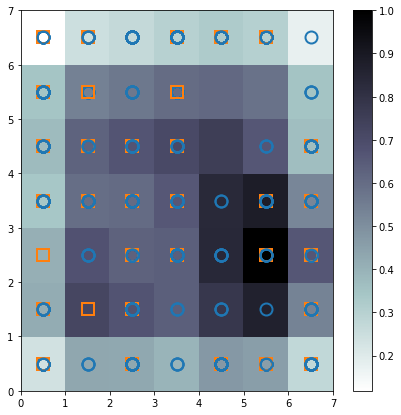

In [5]:

from minisom import MiniSom
import matplotlib.pyplot as plt

# Normalize the dataset
data = X - np.mean(phi_n, axis=0)
data /= np.std(data)

# Initialization and training
som_res = 7 # The image resolution
som = MiniSom(som_res, som_res, 25, sigma=2., learning_rate=.5, random_seed=100)

# Initialize the net weights
som.pca_weights_init(data)

# Train the model
som.train_batch(data, 100000, verbose=True) 

# Plot the weight image
plt.figure(figsize=(7, 7))

# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Use different colors and markers for each label
markers, colors = ['o', 's'], ['C0', 'C1']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

plt.show()


> Notice that the orange squares and the blue circle, represent each, the labels `1` and `0`. Here the perfect solution would be to not have any circle overlapping a square, and vice versa, if one wants to check an ideal classification using self organizing maps, please check out this [link](https://github.com/JustGlowing/minisom/tree/master/examples/resulting_images). Here we cannot segregate correctly the data, therefore it is not so clear that the model without guidence (unsupervised learning) is able to tell the diference on the data. Of course there are some circles and squares that are alone, and those provide a consistent representation of `0` and `1` outputs, respectivelly.

> Surelly this model could be used as a oposite afirmative... for example, if the data pass on the self organizing map and land on the field where there is only a circle, it will definitely not be a `1` output, and vice versa. But probably it is to much work to have only a little enhance on the final performance. 